In [1]:
#pip install -e gym-cliffwalking

In [1]:
import gym
import gym_cliffwalking
import numpy as np

In [2]:
env = gym.make('cliffwalking-v0')

In [3]:
env.reset()

0

In [4]:
env.step(1)

(0, -1.0, False, {})

In [5]:
env.step(2)

(0, -1.0, False, {})

In [6]:
def egreedy_policy(q_values, state, epsilon):
    # Get a random number from a uniform distribution between 0 and 1,
    # if the number is lower than epsilon choose a random action
    if np.random.random() < epsilon:
        return np.random.choice(4)
    # Else choose the action with the highest value
    else:
        return np.argmax(q_values[state])


In [7]:
epsilon = 0
num_states = 48
num_actions = 4

alfa = 0.9
gamma = 0.9

In [32]:
def q_learning(epsilon):
    # Iterate over 500 episodes
    q_values = np.zeros((num_states, num_actions))
    q_learning_rewards = []

    for i in range(500):
        state = env.reset()
        reward_sum = 0
        done = False

        # While episode is not over
        while not done:
            # Choose action        
            action = egreedy_policy(q_values, state, epsilon)
            # Do the action
            next_state, reward, done, test = env.step(action)
            reward_sum += reward
            # Update q_values
            q_values[state][action] += alfa*(reward+gamma*np.max(q_values[next_state])-q_values[state][action])
            #print(f"Previous state: {state}, Action: {action}, Next state: {next_state}")
            #print(q_values[state][0])
            #print(q_values[state][1])
            #print(q_values[state][2])
            #print(q_values[state][3])
            #if i == 499:
                #print(f"Previous state: {state}, Action: {action}, Next state: {next_state}") 
                #print(q_values[state][0])
                #print(q_values[state][1])
                #print(q_values[state][2])
                #print(q_values[state][3])
            #Update state
            state = next_state
        

        q_learning_rewards.append(reward_sum)
        
    return q_learning_rewards, q_values


In [33]:
epsilon = 0

In [34]:
q_learning(epsilon)

([-116.0,
  -1316.0,
  -112.0,
  -92.0,
  -64.0,
  -121.0,
  -57.0,
  -35.0,
  -71.0,
  -60.0,
  -33.0,
  -56.0,
  -30.0,
  -45.0,
  -37.0,
  -19.0,
  -15.0,
  -28.0,
  -29.0,
  -43.0,
  -20.0,
  -19.0,
  -20.0,
  -22.0,
  -15.0,
  -19.0,
  -15.0,
  -22.0,
  -24.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13.0,
  -13

In [35]:
q_learning_rewards, i=q_learning(epsilon)
np.mean(q_learning_rewards)

-17.356

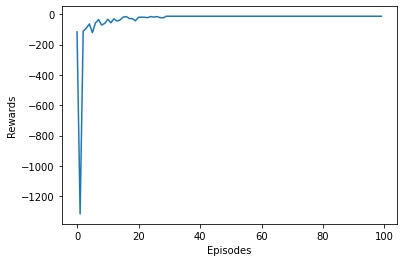

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel('Episodes')
#plt.ylim([-130,0])
ax.set_ylabel('Rewards')
ax.plot(q_learning_rewards)

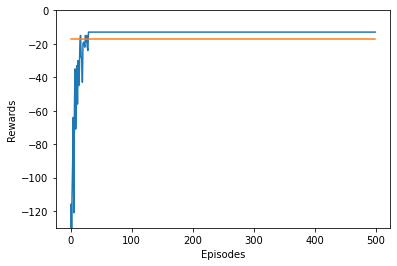

In [36]:
q_learning_rewards, i= zip(*[q_learning(epsilon) for i in range(100)])

avg_rewards= np.mean(q_learning_rewards, axis=0) 
mean_reward = [np.mean(avg_rewards)] * len(avg_rewards)
fig, ax = plt.subplots()
ax.set_xlabel('Episodes')
ax.set_ylabel('Rewards')
plt.ylim([-130,0])
ax.plot(avg_rewards)
ax.plot(mean_reward)

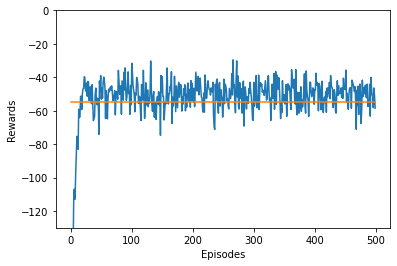

In [37]:
q_learning_rewards, i= zip(*[q_learning(0.1) for i in range(100)])

avg_rewards= np.mean(q_learning_rewards, axis=0) 
mean_reward = [np.mean(avg_rewards)] * len(avg_rewards)
fig, ax = plt.subplots()
ax.set_xlabel('Episodes')
ax.set_ylabel('Rewards')
plt.ylim([-130,0])
ax.plot(avg_rewards)
ax.plot(mean_reward)